In [263]:
# -*- coding: UTF-8 -*-

# 任意选一个你喜欢的整数，这能帮你得到稳定的结果
seed = 114406

# 欢迎来到线性回归项目

若项目中的题目有困难没完成也没关系，我们鼓励你带着问题提交项目，评审人会给予你诸多帮助。

所有选做题都可以不做，不影响项目通过。如果你做了，那么项目评审会帮你批改，也会因为选做部分做错而判定为不通过。

其中非代码题可以提交手写后扫描的 pdf 文件，或使用 Latex 在文档中直接回答。

# 1 矩阵运算

## 1.1 创建一个 4*4 的单位矩阵

In [264]:
# 这个项目设计来帮你熟悉 python list 和线性代数
# 你不能调用任何NumPy以及相关的科学计算库来完成作业


# 本项目要求矩阵统一使用二维列表表示，如下：
A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

# 向量也用二维列表表示
C = [[1],
     [2],
     [3]]

#TODO 创建一个 4*4 单位矩阵
I = [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]

## 1.2 返回矩阵的行数和列数

In [265]:
# TODO 返回矩阵的行数和列数
def shape(M):
    #假定所有传入的数组都是二维数组
    rows = len(M)
    cols = len(M[0])
    for i, row in enumerate(M):
        #assume all rows have same number of columns
        assert cols == len(row), "第 %d 行的列数和其他行不同，%d列" %(i, len(row))
    return rows, cols

In [266]:
# 运行以下代码测试你的 shape 函数
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## 1.3 每个元素四舍五入到特定小数数位

In [267]:
# TODO 每个元素四舍五入到特定小数数位
# 直接修改参数矩阵，无返回值
def matxRound(M, decPts=4):
    rows = shape(M)[0]
    cols = shape(M)[1]
    for i in range(rows):
        for j in range(cols):
            M[i][j] = round(M[i][j], decPts)
    

In [268]:
# 运行以下代码测试你的 matxRound 函数
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.067s

OK


In [269]:
# TODO 计算矩阵的转置
def transpose(M):
    
    '''
    #经验证，发现问题出在“*”上，*应该是拷贝了5个引用（想象一下指针），每个对象指向同一块内容。
    #所以只要改变其中任何一个内容，其它几个内容都会改变。
    #new_rows = [0]*rows
    #M_T = [new_rows]*cols
    #因此N维数组的建立和赋值应该是两个for循环完成
    rows,cols = shape(M)
    M_T = [[0 for i in range(rows)] for j in range(cols)]
    for i in range(cols):
        for j in range(rows):
            M_T[i][j] = M[j][i]
    return M_T
    '''
    #老师提供了一个更牛，更简单的算法，牛逼！
    # 1.一方面利用了*获取每列组成一个tuple参数;
    # 2. 利用zip来完成tuple的迭代
    # 3. 在重新组成list和二维矩阵
    return [list(col) for col in zip(*M)]


## 1.4 计算矩阵的转置

In [270]:
# 运行以下代码测试你的 transpose 函数
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.011s

OK


## 1.5 计算矩阵乘法 AB

In [271]:
# TODO 计算矩阵乘法 AB，如果无法相乘则raise ValueError
# 1)当矩阵A的列数等于矩阵B的行数时，A与B可以相乘。
# 2)矩阵C的行数等于矩阵A的行数，C的列数等于B的列数。
# 3) 乘积C的第m行第n列的元素等于矩阵A的第m行的元素与矩阵B的第n列对应元素乘积之和。
def matxMultiply(A, B):
    r_A, c_A = shape(A)
    r_B, c_B = shape(B)

    C = [[0 for i in range(c_B)] for j in range(r_A)]
    try:
        if c_A != r_B:
            raise ValueError

        #矩阵C的行数等于矩阵A的行数，C的列数等于B的列数。
        for i in range(r_A):
            for j in range(c_B):
                p =0
                while p < c_A:
                    C[i][j] += A[i][p]*B[p][j]
                    p+=1

    except ValueError:
            raise ValueError("The columns of the Matrix A aren't euqal to the rows of the Matrix B, so they can't be multiplied" )

    return C

In [272]:
# 运行以下代码测试你的 matxMultiply 函数
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.129s

OK


---

# 2 Gaussign Jordan 消元法

## 2.1 构造增广矩阵

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

返回 $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [273]:
# TODO 构造增广矩阵，假设A，b行数相同
def augmentMatrix(A, b):
    '''
    r_A, c_A = shape(A)
    r_B, c_B = shape(b)
    new_A = [[0 for i in range(c_A + c_B)] for j in range(r_A)]
    #new_A = deepcopy(A)

    try:
        #判断A，b的行数相同
        if r_A != r_B:
            raise ValueError

        for i in range(r_A):
            for j in range(c_A + c_B):
                if j < c_A:
                    new_A[i][j] = A[i][j]
                else:
                    #print b[i][j-cols_A]
                    new_A[i][j] = b[i][j-c_A]
    except ValueError:
        raise ValueError("The rows of the matrix A must be equal to the rows of b")
    return new_A
    '''
    #采用老师推荐新的方法特别好使，简单简洁
    return [ra + rb for ra,rb in zip(A,b)]

In [274]:
# 运行以下代码测试你的 augmentMatrix 函数
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.007s

OK


## 2.2 初等行变换
- 交换两行
- 把某行乘以一个非零常数
- 把某行加上另一行的若干倍：

In [275]:
# TODO r1 <---> r2
# 直接修改参数矩阵，无返回值
def swapRows(M, r1, r2):
    #获得matrix 的行数，传入的参数行号应该小于行数
    rows = shape(M)[0]
    assert r1 < rows
    assert r2 < rows
    '''
    array = M[r2]
    M[r2] = M[r1]
    M[r1] = array
    '''
    #采用老师推荐的一种方式特别简单
    M[r1],M[r2] = M[r2],M[r1] 

In [276]:
# 运行以下代码测试你的 swapRows 函数
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


In [277]:
# TODO r1 <--- r1 * scale
# scale为0是非法输入，要求 raise ValueError
# 直接修改参数矩阵，无返回值
def scaleRow(M, r, scale):
    if abs(scale)<1e-16:
        raise ValueError ("scale should not be 0")
    rows = shape(M)[0]
    assert r<rows, "输入的行号应该小于行数"
    
    M[r] = [x*scale for x in M[r]]

In [278]:
# 运行以下代码测试你的 scaleRow 函数
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [279]:
# TODO r1 <--- r1 + r2*scale
# 直接修改参数矩阵，无返回值
def addScaledRow(M, r1, r2, scale):
    rows = shape(M)[0]
    assert r1 <rows, "输入的行号应该小于行数"
    assert r2 <rows, "输入的行号应该小于行数"
    if abs(scale)< 1e-16:
        raise ValueError ("scale should not be 0")

    M[r1] = [x+y*scale for x,y in zip(M[r1], M[r2])]

In [280]:
# 运行以下代码测试你的 addScaledRow 函数
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## 2.3  Gaussian Jordan 消元法求解 Ax = b

### 2.3.1 算法

步骤1 检查A，b是否行数相同

步骤2 构造增广矩阵Ab

步骤3 逐列转换Ab为化简行阶梯形矩阵 [中文维基链接](https://zh.wikipedia.org/wiki/%E9%98%B6%E6%A2%AF%E5%BD%A2%E7%9F%A9%E9%98%B5#.E5.8C.96.E7.AE.80.E5.90.8E.E7.9A.84-.7Bzh-hans:.E8.A1.8C.3B_zh-hant:.E5.88.97.3B.7D-.E9.98.B6.E6.A2.AF.E5.BD.A2.E7.9F.A9.E9.98.B5)
    
    对于Ab的每一列（最后一列除外）
        当前列为列c
        寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值
        如果绝对值最大值为0
            那么A为奇异矩阵，返回None (你可以在选做问题2.4中证明为什么这里A一定是奇异矩阵)
        否则
            使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c） 
            使用第二个行变换，将列c的对角线元素缩放为1
            多次使用第三个行变换，将列c的其他元素消为0
            
步骤4 返回Ab的最后一列

**注：** 我们并没有按照常规方法先把矩阵转化为行阶梯形矩阵，再转换为化简行阶梯形矩阵，而是一步到位。如果你熟悉常规方法的话，可以思考一下两者的等价性。

### 2.3.2 算法推演

为了充分了解Gaussian Jordan消元法的计算流程，请根据Gaussian Jordan消元法，分别手动推演矩阵A为***可逆矩阵***，矩阵A为***奇异矩阵***两种情况。

#### 推演示例 


$Ab = \begin{bmatrix}
    -7 & 5 & -1 & 1\\
    1 & -3 & -8 & 1\\
    -10 & -2 & 9 & 1\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & \frac{1}{5} & -\frac{9}{10} & -\frac{1}{10}\\
    0 & -\frac{16}{5} & -\frac{71}{10} & \frac{11}{10}\\
    0 & \frac{32}{5} & -\frac{73}{10} & \frac{3}{10}\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & 0 & -\frac{43}{64} & -\frac{7}{64}\\
    0 & 1 & -\frac{73}{64} & \frac{3}{64}\\
    0 & 0 & -\frac{43}{4} & \frac{5}{4}\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & 0 & 0 & -\frac{3}{16}\\
    0 & 1 & 0 & -\frac{59}{688}\\
    0 & 0 & 1 & -\frac{5}{43}\end{bmatrix}$
    

#### 推演有以下要求:
1. 展示每一列的消元结果, 比如3*3的矩阵, 需要写三步
2. 用分数来表示
3. 分数不能再约分
4. 我们已经给出了latex的语法,你只要把零改成你要的数字(或分数)即可
5. 检查你的答案, 可以用[这个](http://www.math.odu.edu/~bogacki/cgi-bin/lat.cgi?c=sys), 或者后面通过单元测试后的`gj_Solve`

_你可以用python的 [fractions](https://docs.python.org/2/library/fractions.html) 模块辅助你的约分_

#### 以下开始你的尝试吧!

In [281]:
# 不要修改这里！
from helper import *
from fractions import Fraction

A = generateMatrix(3,seed,singular=False)
b = np.ones(shape=(3,1),dtype=int) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # 请确保你的增广矩阵已经写好了
printInMatrixFormat(Ab,padding=3,truncating=0)


 -5,  2,  3 ||  1 
 -3, -1,  6 ||  1 
 -1, -6,  8 ||  1 


请按照算法的步骤3，逐步推演***可逆矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵。

要求：
1. 做分数运算
2. 使用`\frac{n}{m}`来渲染分数，如下：
 - $\frac{n}{m}$
 - $-\frac{a}{b}$


$ Ab = \begin{bmatrix}
    -5 & 2 & 3 & 1 \\
    -3 & -1 & 6 & 1 \\
    -1 & -6 & 8 & 1 \end{bmatrix}$

$ --> \begin{bmatrix}
    1 & -\frac{2}{5} & -\frac{3}{5} & -\frac{1}{5} \\
    -3 & -1 & 6 & 1 \\
    -1 & -6 & 8 & 1 \end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & -\frac{2}{5} & -\frac{3}{5} & -\frac{1}{5} \\
    0 & -\frac{11}{5} & \frac{21}{5} & \frac{2}{5} \\
    0 & -\frac{32}{5} & \frac{37}{5} & \frac{4}{5} \end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & -\frac{2}{5} & -\frac{3}{5} & -\frac{1}{5} \\
    0 & 1 & -\frac{21}{11} & -\frac{2}{11} \\
    0 & -\frac{32}{5} & \frac{37}{5} & \frac{4}{5} \end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & -\frac{15}{11} & -\frac{3}{11} \\
    0 & 1 & -\frac{21}{11} & -\frac{2}{11} \\
    0 & 0 & -\frac{53}{11} & -\frac{4}{11} \end{bmatrix}$

$ --> \begin{bmatrix}
    1 & 0 & -\frac{15}{11} & -\frac{3}{11} \\
    0 & 1 & -\frac{21}{11} & -\frac{2}{11} \\
    0 & 0 & 1 & \frac{4}{53} \end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & -\frac{15}{11} & -\frac{3}{11} \\
    0 & 1 & -\frac{21}{11} & -\frac{2}{11} \\
    0 & 0 & 1 & \frac{4}{53} \end{bmatrix}$

$ --> \begin{bmatrix}
    1 & 0 & 0 & -\frac{9}{53} \\
    0 & 1 & -\frac{21}{11} & -\frac{2}{11} \\
    0 & 0 & 1 & \frac{4}{53} \end{bmatrix}$

$ --> \begin{bmatrix}
    1 & 0 & 0 & -\frac{9}{53} \\
    0 & 1 & 0 & -\frac{2}{53} \\
    0 & 0 & 1 & \frac{4}{53} \end{bmatrix}$

In [282]:
# 不要修改这里！
A = generateMatrix(3,seed,singular=True)
b = np.ones(shape=(3,1),dtype=int)
Ab = augmentMatrix(A.tolist(),b.tolist()) # 请确保你的增广矩阵已经写好了
printInMatrixFormat(Ab,padding=3,truncating=0)

  2,  1, -1 ||  1 
 -2,  3,  2 ||  1 
 -4,-10,  0 ||  1 


请按照算法的步骤3，逐步推演***奇异矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵。

要求：
1. 做分数运算
2. 使用`\frac{n}{m}`来渲染分数，如下：
 - $\frac{n}{m}$
 - $-\frac{a}{b}$

交换首行首列最大值，归一化

$Ab = \begin{bmatrix}
    -4 & -10 & 0 & 1 \\
    -2 & 3 & 2 & 1 \\
    2 & 1 & -1 & 1 \end{bmatrix}$

$ --> \begin{bmatrix}
    1 & \frac{5}{2} & 0 & -\frac{1}{4} \\
    -2 & 3 & 2 & 1 \\
    2 & 1 & -1 & 1 \end{bmatrix}$

$ --> \begin{bmatrix}
    1 & \frac{5}{2} & 0 & -\frac{1}{4} \\
    0 & 8 & 2 & \frac{1}{2} \\
    0 & -4 & -1 & \frac{3}{2} \end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & \frac{5}{2} & 0 & -\frac{1}{4} \\
    0 & 1 & \frac{1}{4} & \frac{1}{16} \\
    0 & -4 & -1 & \frac{3}{2} \end{bmatrix}$

$ --> \begin{bmatrix}
    1 & 0 & -\frac{5}{8} & -\frac{13}{32} \\
    0 & 1 & \frac{1}{4} & \frac{1}{16} \\
    0 & 0 & 0 & \frac{7}{4} \end{bmatrix}$第二行第二列以下消元为0

出现0X=b,无穷解，矩阵的轶为2，不是满轶，为奇异矩阵

$...$

### 2.3.3 实现 Gaussian Jordan 消元法

In [314]:
# TODO 实现 Gaussain Jordan 方法求解 Ax = b

""" Gaussian Jordan 方法求解 Ax = b.
    参数
        A: 方阵 
        b: 列向量
        decPts: 四舍五入位数，默认为4
        epsilon: 判读是否为0的阈值，默认 1.0e-16
        
    返回列向量 x 使得 Ax = b 
    返回None，如果 A，b 高度不同
    返回None，如果 A 为奇异矩阵
"""
from copy import deepcopy
def clear_coefficients_below(A, row, col, rows, eps=1.0e-16):
    #print "clear_coefficients_below from %d row and %d col" %(row, col)
    #起点要从row+1开始，就是row的下一行开始，到最后一行
    for k in range(row+1, rows):
        if abs(A[row][col]) > eps:
            alpha = -(A[k][col])/(A[row][col])
            if abs(alpha) > eps:
                addScaledRow(A, k, row, alpha)
                
def clear_coefficients_above(A, row, col, eps=1.0e-16):
    #起点要从0开始，到row的上一行此列进行校园
    #print "clear_coefficients_above from %d row and %d col" %(row, col)
    for k in range(row):
        if abs(A[row][col]) > eps:
            alpha = -(A[k][col])/(A[row][col])
            if abs(alpha) > eps:
                addScaledRow(A, k, row, alpha)
    
#将高斯约尔当消元法出来单独成为一个函数
def gj_clear_coefficients(M, rows, cols, decPts=4,epsilon = 1.0e-16):
    new_M = deepcopy(M)
    
    #开始初等变换, 从第一行第一列从左到右开始
    row = 0
    col = 0
    while(row<rows and col<cols):
        
        #寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值
        row_w_max_val = row
        max_value = new_M[row][col]
        #从row行开始找出此col列最大值
        for i in range(row+1, rows):
            if abs(new_M[i][col]) > abs(max_value):
                max_value = new_M[i][col]
                row_w_max_val = i
                
        # 如果绝对值最大值不为0,那么A为非奇异矩阵，可以消元
        if abs(round(max_value, decPts)) > epsilon:
            if (row_w_max_val != row):
                swapRows(new_M, row, row_w_max_val)
                
            #使用第二个行变换，将列c的对角线元素缩放为1,归1
            alpha = 1.0/new_M[row][col]
            if abs(round((new_M[row][col]-1),decPts)) > epsilon:
                scaleRow(new_M, row, alpha)
            #print Ab[row]
            #多次使用第三个行变换，将列c的其他元素消为0
            
            clear_coefficients_above(new_M, row, col, epsilon)
            clear_coefficients_below(new_M, row, col, rows, epsilon)
            row +=1
        else:
            #如果绝对值最大值为0，那么A为奇异矩阵
            return None
        col +=1
    #把矩阵精细到小数点4位
    #matxRound(new_M, decPts=4)
    return new_M
    
def gj_Solve(A, b, decPts=4, epsilon = 1.0e-16):
    rows_A, cols_A = shape(A)
    rows_B = shape(b)[0]
    
    # 首先检查A矩阵是不是方阵（即行数和列数相等的矩阵。若行数和列数不相等，那就谈不上奇异矩阵和非奇异矩阵）
    if rows_A != cols_A:
        print "This matrix A is not a square matrix, columns is not equal to rows"
        return None
    
    #首先形成增广矩阵
    Ab = augmentMatrix(A,b)
    #将增广矩阵变成梯形矩阵，并进行消元
    new_Ab = gj_clear_coefficients(Ab,rows_A, cols_A)
    
    if new_Ab == None:
        #奇异矩阵
        print A
        print "The Matrix Ab is a singular matrix, can't get a solution"
        return None
    
    #matxRound(new_Ab, decPts=4)
    new_b = []
    #第四步，返回最后一列
    for i in range(rows_B):
        #print Ab[i][cols_A]
        new_b.append([Fraction(new_Ab[i][cols_A]).limit_denominator()])
    return new_b

In [315]:
# 运行以下代码测试你的 gj_Solve 函数
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

[[-2, -1, -9], [-4, -2, -5], [0, 0, 5]]
The Matrix Ab is a singular matrix, can't get a solution
[[-3, -10, -10], [8, 4, 4], [-1, -6, -6]]
The Matrix Ab is a singular matrix, can't get a solution
[[-6, -4, -10], [6, -9, -3], [-2, 6, 4]]
The Matrix Ab is a singular matrix, can't get a solution
[[-10, -6, 6], [-10, 7, -7], [8, 9, -9]]
The Matrix Ab is a singular matrix, can't get a solution


.
----------------------------------------------------------------------
Ran 1 test in 30.333s

OK


## (选做) 2.4 算法正确判断了奇异矩阵：

在算法的步骤3 中，如果发现某一列对角线和对角线以下所有元素都为0，那么则断定这个矩阵为奇异矩阵。

我们用正式的语言描述这个命题，并证明为真。

证明下面的命题：

**如果方阵 A 可以被分为4个部分: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} , \text{其中 I 为单位矩阵，Z 为全0矩阵，Y 的第一列全0}$，

**那么A为奇异矩阵。**

提示：从多种角度都可以完成证明
- 考虑矩阵 Y 和 矩阵 A 的秩
- 考虑矩阵 Y 和 矩阵 A 的行列式
- 考虑矩阵 A 的某一列是其他列的线性组合

TODO 证明：

# 3  线性回归

## 3.1 随机生成样本点

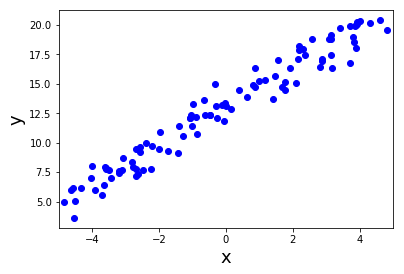

In [302]:
# 不要修改这里！
# 运行一次就够了！
from helper import *
from matplotlib import pyplot as plt
%matplotlib inline

X,Y = generatePoints(seed,num=100)

## 可视化
plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.show()

## 3.2 拟合一条直线

### 3.2.1 猜测一条直线

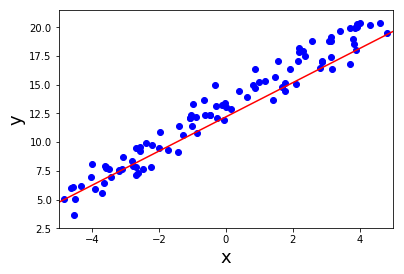

In [303]:
import random
#TODO 请选择最适合的直线 y = mx + b
index_a = int(random.random()*100)
index_b = int(random.random()*100)
while index_b == index_a:
	index_b = int(random.random()*100)

point_a = (X[index_a], Y[index_a])
point_b = (X[index_b], Y[index_b])

direction_vector = [x-y for x,y in zip(point_a, point_b)]
#因为normal vector = [A,B], Direction vector = [B, -A]
#y=mx+b 的normal vector是(m, -1)因此，随便用两个点的normal vector已经获得，我们因此可以获得一条线
#在这条线上，任何一点都可以base point因此K的求值很简单了。
'''
因为不允许用之前写的任何私有类，因此修改此处代码
normal_vector = Vector([direction_vector.coordinates[1], -(direction_vector.coordinates[0])])
A = normal_vector.coordinates[0]
B = normal_vector.coordinates[1]
'''
normal_vector = [direction_vector[1], -direction_vector[0]]
A = normal_vector[0]
B = normal_vector[1]
K1 = [x*y for x,y in zip(point_a, normal_vector)]
K = sum(K1)

#按照y=mx+b来计算
m1 = float(-A/B)
b1 = float(K/B)


# 不要修改这里！
plt.xlim((-5,5))
x_vals = plt.axes().get_xlim()
y_vals = [m1*x+b1 for x in x_vals]
plt.plot(x_vals, y_vals, '-', color='r')

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')

plt.show()

### 3.2.2 计算平均平方误差 (MSE)

我们要编程计算所选直线的平均平方误差(MSE), 即数据集中每个点到直线的Y方向距离的平方的平均数，表达式如下：
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

In [304]:
# TODO 实现以下函数并输出所选直线的MSE

def calculateMSE(X,Y,m,b):
    MSE = 0
    n = len(X)
    assert n == len(Y),"the number of X items should be equal to the number of Y items"
    for i in range(n):
        MSE += (Y[i]-m*X[i]-b)**2
    return MSE/n

print(calculateMSE(X,Y,m1,b1))

1.8831463167


### 3.2.3 调整参数 $m, b$ 来获得最小的平方平均误差

你可以调整3.2.1中的参数 $m1,b1$ 让蓝点均匀覆盖在红线周围，然后微调 $m1, b1$ 让MSE最小。

## 3.3 (选做) 找到参数 $m, b$ 使得平方平均误差最小

**这一部分需要简单的微积分知识(  $ (x^2)' = 2x $ )。因为这是一个线性代数项目，所以设为选做。**

刚刚我们手动调节参数，尝试找到最小的平方平均误差。下面我们要精确得求解 $m, b$ 使得平方平均误差最小。

定义目标函数 $E$ 为
$$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

因为 $E = \frac{n}{2}MSE$, 所以 $E$ 取到最小值时，$MSE$ 也取到最小值。要找到 $E$ 的最小值，即要找到 $m, b$ 使得 $E$ 相对于 $m$, $E$ 相对于 $b$ 的偏导数等于0. 

因此我们要解下面的方程组。

$$
\begin{cases}
\displaystyle
\frac{\partial E}{\partial m} =0 \\
\\
\displaystyle
\frac{\partial E}{\partial b} =0 \\
\end{cases}
$$

### 3.3.1 计算目标函数相对于参数的导数
首先我们计算两个式子左边的值

证明/计算：
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-(y_i - mx_i - b)}
$$

TODO 证明:

### 3.3.2 实例推演

现在我们有了一个二元二次方程组

$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
$$

为了加强理解，我们用一个实际例子演练。

我们要用三个点 $(1,1), (2,2), (3,2)$ 来拟合一条直线 y = m*x + b, 请写出

- 目标函数 $E$, 
- 二元二次方程组，
- 并求解最优参数 $m, b$

TODO 写出目标函数，方程组和最优参数

### 3.3.3 将方程组写成矩阵形式

我们的二元二次方程组可以用更简洁的矩阵形式表达，将方程组写成矩阵形式更有利于我们使用 Gaussian Jordan 消元法求解。

请证明 
$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = X^TXh - X^TY
$$

其中向量 $Y$, 矩阵 $X$ 和 向量 $h$ 分别为 :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

TODO 证明:

至此我们知道，通过求解方程 $X^TXh = X^TY$ 来找到最优参数。这个方程十分重要，他有一个名字叫做 **Normal Equation**，也有直观的几何意义。你可以在 [子空间投影](http://open.163.com/movie/2010/11/J/U/M6V0BQC4M_M6V2AJLJU.html) 和 [投影矩阵与最小二乘](http://open.163.com/movie/2010/11/P/U/M6V0BQC4M_M6V2AOJPU.html) 看到更多关于这个方程的内容。

### 3.4 求解 $X^TXh = X^TY$ 

在3.3 中，我们知道线性回归问题等价于求解 $X^TXh = X^TY$ (如果你选择不做3.3，就勇敢的相信吧，哈哈)

In [305]:
# TODO 实现线性回归
'''
参数：X, Y 存储着一一对应的横坐标与纵坐标的两个一维数组
返回：m，b 浮点数
'''
def linearRegression(X,Y):
    #Step 1:本项目所有矩阵都为二维矩阵，因此首先把X,Y都变成二维的
    c = [[1] for i in range(len(X))]
    new_X = [[X[i],1] for i in range(len(X))]
    new_Y = [[Y[i]] for i in range(len(Y))]
    
    #Step2: 合并X和常量,计算X^TY, 和 X^TX
    #new_X = augmentMatrix(new_X,c)
    b =  matxMultiply(transpose(new_X), new_Y)
    A = matxMultiply(transpose(new_X),new_X)

    #Step3: 用高斯消元法去解 Ax=b, 实际上是求解  X^TXh=X^TY
    h = gj_Solve(A,b)
    #fraction转换成float时一定要把分子分母分别先变成float
    m = round(float(h[0][0].numerator)/float(h[0][0].denominator), 4)
    b = round(float(h[1][0].numerator)/float(h[1][0].denominator), 4)
    return m, b

m2,b2 = linearRegression(X,Y)
assert isinstance(m2,float),"m is not a float"
assert isinstance(b2,float),"b is not a float"
print(m2,b2)

(1.6454, 13.0919)


你求得的回归结果是什么？
请使用运行以下代码将它画出来。

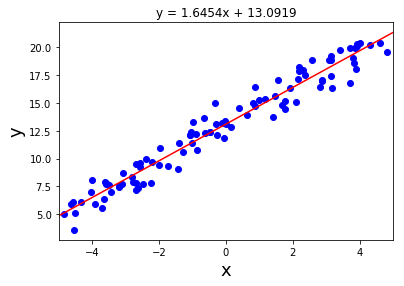

In [306]:
# 请不要修改下面的代码
x1,x2 = -5,5
y1,y2 = x1*m2+b2, x2*m2+b2

plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.plot((x1,x2),(y1,y2),'r')
plt.title('y = {m:.4f}x + {b:.4f}'.format(m=m2,b=b2))
plt.show()

你求得的回归结果对当前数据集的MSE是多少？

In [307]:
print(calculateMSE(X,Y,m2,b2))

0.948289392198
